<a href="https://colab.research.google.com/github/imR2D2/logisticRegression/blob/main/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SELECCIONAREMOS EN "X" LA EDAD Y EN "Y" EL PRESTAMO



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
Precisión del modelo: 0.8375746846647488


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


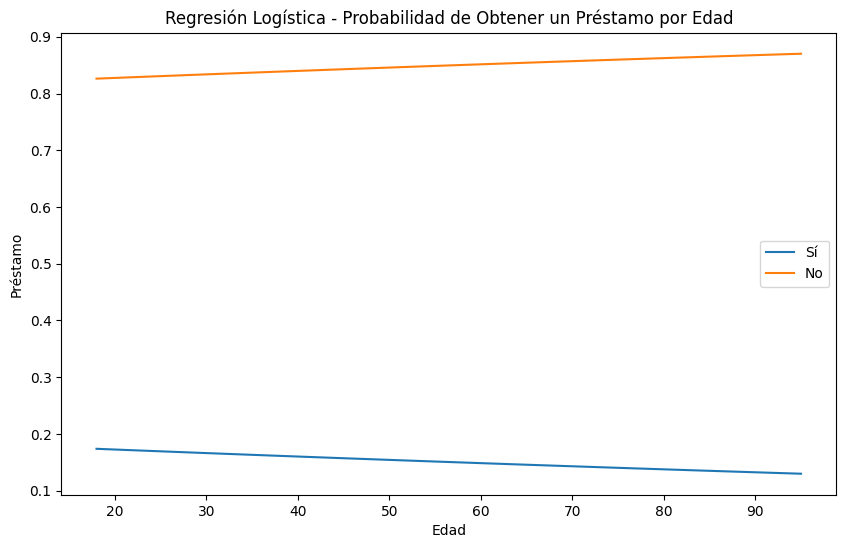


Para una edad de 36, la predicción es: No, no puede obtener un préstamo



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Montar Google Drive en Colab
from google.colab import drive
drive.mount('/gdrive')

# Ruta del archivo CSV
ruta = "/gdrive/MyDrive/mineriaDatos/dataset_banco_clean.csv"
df = pd.read_csv(ruta, encoding='latin')

# Seleccionar las características (X) y la variable objetivo (y)
X = df[['age']]
y = df['loan']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Calcular las probabilidades de pertenecer a cada categoría
edad_rango = np.arange(X['age'].min(), X['age'].max() + 1).reshape(-1, 1)
probabilidades = model.predict_proba(edad_rango)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
# Probabilidad de pertenecer a la clase 'Sí'
plt.plot(edad_rango, probabilidades[:, 1], label='Sí')
# Probabilidad de pertenecer a la clase 'No'
plt.plot(edad_rango, probabilidades[:, 0], label='No')
plt.xlabel('Edad')
plt.ylabel('Préstamo')
plt.title('Regresión Logística - Probabilidad de Obtener un Préstamo por Edad')
plt.legend()
plt.show()

# Función para predecir si se puede obtener un préstamo en función de la edad
def predecir_prestamo_por_edad(edad):
    if edad < X['age'].min() or edad > X['age'].max():
        return "La edad está fuera del rango de datos disponibles"
    else:
        prediccion = model.predict([[edad]])
        if prediccion[0] == 'yes':
            return "Sí, puede obtener un préstamo"
        else:
            return "No, no puede obtener un préstamo"

# Ejemplo de uso de la función para predecir si se puede obtener un préstamo
edad_ejemplo = 36
resultado = predecir_prestamo_por_edad(edad_ejemplo)
print("")
print(f"Para una edad de {edad_ejemplo}, la predicción es: {resultado}")
print("")

Como el resultado no fue tan favorable, decidi agregar mas variables al analisis para que sea mas preciso

## SELECCIONAREMOS AHORA LOS SIGUIENTES DATOS Y EL PORQUÉ

job: El tipo de trabajo de la persona. Este atributo puede ser útil para capturar la relación entre el tipo de trabajo y la elegibilidad de un préstamo. Podrías convertirlo en variables numéricas utilizando técnicas como codificación one-hot o codificación ordinal.

edad: Ayuda a ver si realmente puede pedir prestamos mediante la edad

balance: El saldo de la cuenta bancaria de la persona. El saldo puede reflejar la situación financiera de la persona y, por lo tanto, puede influir en la elegibilidad del préstamo.

housing: Si la persona tiene una hipoteca o no. Este atributo puede ser relevante para determinar la elegibilidad de un préstamo.



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
Información de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null

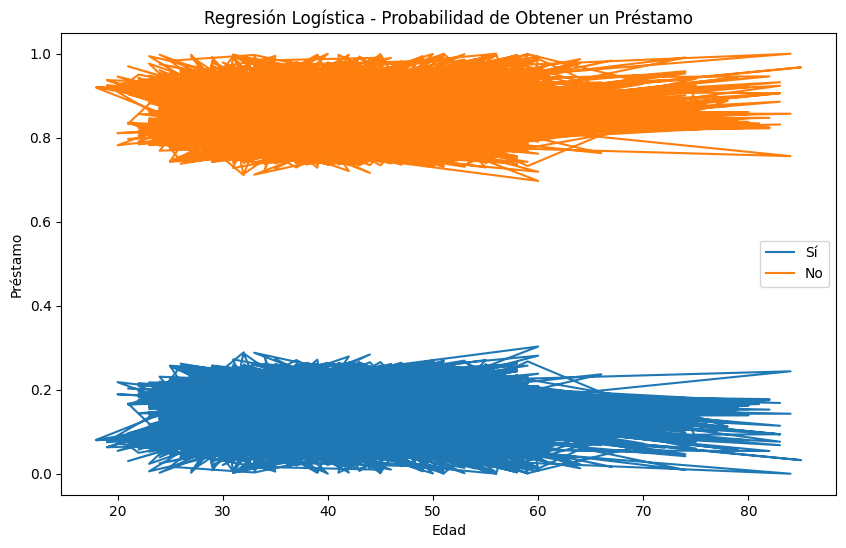

Para una edad de 0, la predicción es: No, no puede obtener un préstamo
Para una edad de 1, la predicción es: No, no puede obtener un préstamo
Para una edad de 2, la predicción es: No, no puede obtener un préstamo
Para una edad de 3, la predicción es: No, no puede obtener un préstamo
Para una edad de 4, la predicción es: No, no puede obtener un préstamo
Para una edad de 5, la predicción es: No, no puede obtener un préstamo
Para una edad de 6, la predicción es: No, no puede obtener un préstamo
Para una edad de 7, la predicción es: No, no puede obtener un préstamo
Para una edad de 8, la predicción es: No, no puede obtener un préstamo
Para una edad de 9, la predicción es: No, no puede obtener un préstamo
Para una edad de 10, la predicción es: No, no puede obtener un préstamo
Para una edad de 11, la predicción es: No, no puede obtener un préstamo
Para una edad de 12, la predicción es: No, no puede obtener un préstamo
Para una edad de 13, la predicción es: No, no puede obtener un préstamo
Pa

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np

# Montar Google Drive en Colab
from google.colab import drive
drive.mount('/gdrive')

# Ruta del archivo CSV
ruta = "/gdrive/MyDrive/mineriaDatos/dataset_banco_clean.csv"
df = pd.read_csv(ruta, encoding='latin')

# Verificar los datos
print("Información de los datos:")
print(df.info())

# Verificar valores faltantes
print("\nValores faltantes:")
print(df.isnull().sum())

# Verificar balance de clases
print("\nBalance de clases:")
print(df['loan'].value_counts())

# Exploración de datos
print("\nExploración de datos:")
print(df.describe())

# Seleccionar las características (X) y la variable objetivo (y)
X = df[['job', 'balance', 'housing', 'age']]
y = df['loan']

# Convertir características categóricas en variables ficticias (one-hot encoding)
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Calcular las probabilidades de pertenecer a cada categoría para el conjunto de prueba
probabilidades = model.predict_proba(X_test)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
# Probabilidad de pertenecer a la clase 'Si'
plt.plot(X_test['age'], probabilidades[:, 1], label='Sí')
# Probabilidad de pertenecer a la clase 'No'
plt.plot(X_test['age'], probabilidades[:, 0], label='No')
plt.xlabel('Edad')
plt.ylabel('Préstamo')
plt.title('Regresión Logística - Probabilidad de Obtener un Préstamo')
plt.legend()
plt.show()

# Función para predecir si se puede obtener un préstamo en función de las características
def predecir_prestamo(job, balance, housing, age):
    # Crear una matriz con las características de entrada
    input_features = pd.DataFrame({
        'job': [job],
        'balance': [balance],
        'housing': [housing],
        'age': [age]
    })

    # Convertir características categóricas en variables ficticias (one-hot encoding)
    input_features = pd.get_dummies(input_features)

    # Alinear las columnas de características con las columnas utilizadas durante el entrenamiento
    input_features = input_features.reindex(columns=X.columns, fill_value=0)

    # Realizar la predicción
    prediccion = model.predict(input_features)

    if prediccion[0] == 'yes':
        return "Sí, puede obtener un préstamo"
    else:
        return "No, no puede obtener un préstamo"

# Ejemplo de uso de la función para predecir si se puede obtener un préstamo
ejemplo_job = 'management'
ejemplo_balance = 1000
ejemplo_housing = 'yes'

for edad in range(0, 101):
    resultado = predecir_prestamo(ejemplo_job, ejemplo_balance, ejemplo_housing, edad)
    print(f"Para una edad de {edad}, la predicción es: {resultado}")


Al hacerlo de la siguiente manera el modelo está prediciendo consistentemente "no" para todas las edades, porque el modelo ha aprendido patrones en los datos que indican que la age, housing, joby balance por sí sola no es un factor determinante para predecir si una persona puede obtener un préstamo.

En este caso, si el modelo ha aprendido patrones que indican que una persona de X años puede obtener un préstamo, la predicción podría ser "Sí, puede obtener un préstamo". Sin embargo, dado el desequilibrio hacia la clase 'no' en los datos proporcionados, es posible que el modelo aún tienda a predecir "No, no puede obtener un préstamo" incluso para edades específicas.